In [3]:
%pip install reservoirpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.1 MB/s eta 0:00:00


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from reservoirpy.datasets import lorenz

In [5]:
##### DATASET #####

def dataset(n_timesteps, sigma, rho, beta, h, x0):
    data = lorenz(n_timesteps=n_timesteps, sigma=sigma, rho=rho, beta=beta, h=h, x0=x0)

    return data

def plotLorenz(data, verbose=True):
    fig = plt.figure()
    x,y,z = data.T
    ax = plt.figure().add_subplot(projection='3d')

    ax.plot(x,y,z, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Lorenz Attractor")

    if verbose:
      ax_x = fig.add_subplot(3, 1, 1)
      ax_y = fig.add_subplot(3, 1, 2)
      ax_z = fig.add_subplot(3, 1, 3)

      ax_x.plot(x, lw=0.5)
      ax_x.set_xlabel("t")
      ax_x.set_ylabel("x")

      ax_y.plot(y, lw=0.5)
      ax_y.set_xlabel("t")
      ax_y.set_ylabel("y")

      ax_z.plot(z, lw=0.5)
      ax_z.set_xlabel("t")
      ax_z.set_ylabel("z")

    plt.show()

In [26]:
n_timesteps = 5000

sigma = 5
rho = 28
beta = 8/3
h = 0.01

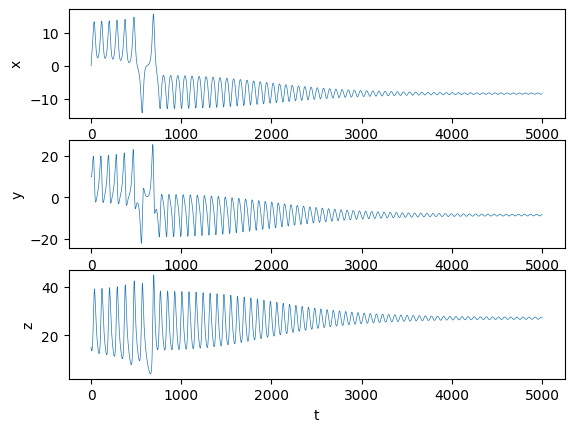

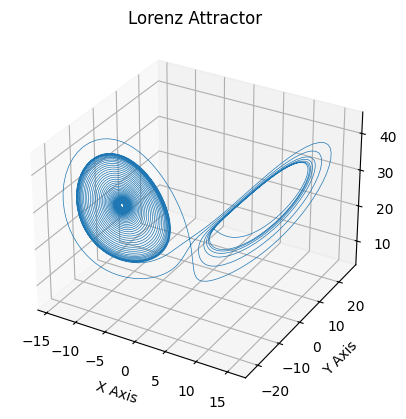

In [31]:
x0 = [0,10,15]

data = dataset(n_timesteps, sigma, rho, beta, h, x0)
plotLorenz(data)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [33]:
# Define the Lorenz system
def lorenz(t, state, sigma=10, beta=8/3, rho=22):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

In [34]:
# Parameters
rho = 22  # Given rho value
sigma = 10
beta = 8/3
t_end = 50
t_span = (0, t_end)  # Time span for evolution
t_eval = np.linspace(*t_span, t_end*100)  # Time points

In [35]:
y_min, y_max, y_step = -20, 20, 50
z_min, z_max, z_step = -10, 70, 50

# Initial conditions on the x=0 plane
y_vals = np.linspace(y_min, y_max, y_step)  # Varying y
z_vals = np.linspace(z_min, z_max, z_step)  # Varying z
initial_conditions_x = [[0, y, z] for y in y_vals for z in z_vals]

x_min, x_max, x_step = -20, 20, 50
z_min, z_max, z_step = 0, 40, 50

# Initial Conditions on the y=0 plane
x_vals = np.linspace(x_min, x_max, x_step)  # Varying x
z_vals = np.linspace(z_min, z_max, z_step)  # Varying z
initial_conditions_y = [[x, 0, z] for x in x_vals for z in z_vals]

# Initial Conditions on the fixed points
fixed_points = [(np.sqrt(beta * (rho - 1)), np.sqrt(beta * (rho - 1)), rho - 1),
                (-np.sqrt(beta * (rho - 1)), -np.sqrt(beta * (rho - 1)), rho - 1)]

u_min, u_max, u_step = 0, 2, .01
v_min, v_max, v_step = 0, 2, .01

u = np.arange(u_min,u_max,u_step)
v = np.arange(v_min,v_max,v_step)

initial_conditions_f = [[u[i]*fixed_points[0][0] + v[j]*fixed_points[1][0],
        u[i]*fixed_points[0][1] + v[j]*fixed_points[1][1],
        u[i]*fixed_points[0][2] + v[j]*fixed_points[1][2]] for i in range(len(u)) for j in range(len(v))]

In [36]:
initial_conditions = initial_conditions_x

In [37]:
# Solve for all initial conditions and classify trajectories
trajectories = []
classifications = []
fixed_points = [(np.sqrt(beta * (rho - 1)), np.sqrt(beta * (rho - 1)), rho - 1),
                (-np.sqrt(beta * (rho - 1)), -np.sqrt(beta * (rho - 1)), rho - 1)]
threshold = 1  # Distance threshold for classification

for init in initial_conditions:

    sol = solve_ivp(lorenz, t_span, init, args=(sigma, beta, rho), t_eval=t_eval)
    sol_y = sol.y
    final_state = sol.y[:, -1]

    if np.linalg.norm(final_state - np.array(fixed_points[0])) < threshold:
        classification = "Fixed Point #1"
    elif np.linalg.norm(final_state - np.array(fixed_points[1])) < threshold:
        classification = "Fixed Point #2"
    else:
        classification = "Butterfly Attractor"

    trajectories.append(sol_y)
    classifications.append(classification)

In [38]:
first_min = y_min
first_max = y_max
first_step = y_step

second_min = z_min
second_max = z_max
second_step = z_step

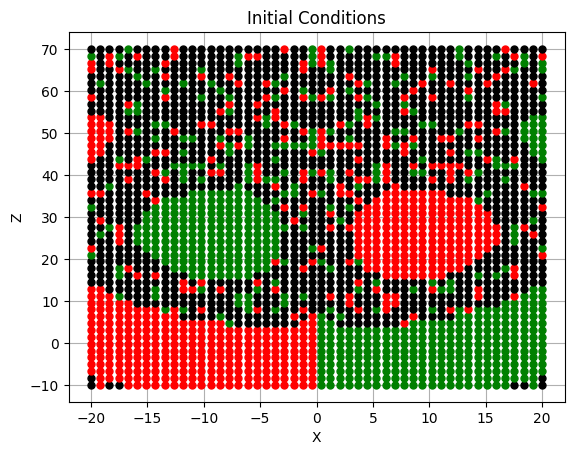

LEGEND 
 RED -- Fixed Point #1 
 GREEN -- Fixed Point #2 
 BLUE -- Butterfly

X MIN: -20, X MAX: 20, X STEP: 50
Z MIN: 0, Z MAX: 40, Z STEP: 50

Time End: 50


In [40]:
for init, classification in zip(initial_conditions, classifications):

    if classification == "Fixed Point #1": color = 'r'
    elif classification == "Fixed Point #2": color = 'g'
    else: color = 'black'

    plt.plot(init[1], init[2], marker='o', markersize=5, color=color)

plt.xlabel('X')
plt.ylabel('Z')
plt.title('Initial Conditions')
plt.grid(True)
plt.show()

print("LEGEND \n RED -- Fixed Point #1 \n GREEN -- Fixed Point #2 \n BLUE -- Butterfly")
print()
print(f"X MIN: {first_min}, X MAX: {first_max}, X STEP: {first_step}")
print(f"Z MIN: {second_min}, Z MAX: {second_max}, Z STEP: {second_step}")
print()
print(f"Time End: {t_end}")